# Life Expectancy - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
import scipy.stats as stats
import plotly.express as px

warnings.filterwarnings('ignore')


Öncelikle burada strip kullanmamın sebebi bazı sütun başlıklarının sonunda istenmeyen boşlukların olması. 

In [2]:
pd.options.display.max_columns = None
death_ = pd.read_csv("datasets_12603_17232_Life Expectancy Data.csv")
death_.columns=[col.strip() for col in death_.columns] 
death_.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0             62     0.01               71.279624         65.0     1154  19.1   
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   
3             69     0.01               78.184215         67.0     2787  17.6   
4             71     0.01                7.097109         68.0     3013  17.2   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [3]:
continents = pd.read_csv("datasets_748584_1294786_2020.csv")
continents = continents[["Regional indicator","Country name"]]

In [4]:
death = pd.merge(death_, continents, left_on='Country', right_on='Country name',how= "outer")

In [5]:
death.drop(death.loc[2938:2958].index, inplace=True)
death = death.rename(columns={'Regional indicator': 'Continent'})
y= death["Continent"]
death.insert(2,"Continents",y)


In [6]:
death.drop(["Continent","Country name"],axis=1,inplace=True)

In [7]:
death.head()

Country    Year  Continents      Status  Life expectancy  \
0  Afghanistan  2015.0  South Asia  Developing             65.0   
1  Afghanistan  2014.0  South Asia  Developing             59.9   
2  Afghanistan  2013.0  South Asia  Developing             59.9   
3  Afghanistan  2012.0  South Asia  Developing             59.5   
4  Afghanistan  2011.0  South Asia  Developing             59.2   

   Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0            263.0           62.0     0.01               71.279624   
1            271.0           64.0     0.01               73.523582   
2            268.0           66.0     0.01               73.219243   
3            272.0           69.0     0.01               78.184215   
4            275.0           71.0     0.01                7.097109   

   Hepatitis B  Measles   BMI  under-five deaths  Polio  Total expenditure  \
0         65.0   1154.0  19.1               83.0    6.0               8.16   
1         62.0    492.0  18.6               86.0   58.0               8.18   
2         64.0    430.0  18.1               89.0   62.0               8.13   
3         67.0   2787.0  17.6               93.0   67.0               8.52   
4         68.0   3013.0  17.2               97.0   68.0               7.87   

   Diphtheria  HIV/AIDS         GDP  Population  thinness  1-19 years  \
0        65.0       0.1  584.259210  33736494.0                  17.2   
1        62.0       0.1  612.696514    327582.0                  17.5   
2        64.0       0.1  631.744976  31731688.0                  17.7   
3        67.0       0.1  669.959000   3696958.0                  17.9   
4        68.0       0.1   63.537231   2978599.0                  18.2   

   thinness 5-9 years  Income composition of resources  Schooling  
0                17.3                            0.479       10.1  
1                17.5                            0.476       10.0  
2                17.7                            0.470        9.9  
3                18.0                            0.463        9.8  
4                18.2                            0.454        9.5

In [8]:
print(death.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   float64
 2   Continents                       2112 non-null   object 
 3   Status                           2938 non-null   object 
 4   Life expectancy                  2928 non-null   float64
 5   Adult Mortality                  2928 non-null   float64
 6   infant deaths                    2938 non-null   float64
 7   Alcohol                          2744 non-null   float64
 8   percentage expenditure           2938 non-null   float64
 9   Hepatitis B                      2385 non-null   float64
 10  Measles                          2938 non-null   float64
 11  BMI                              2904 non-null   float64
 12  under-five deaths   

İnfo'daki bilgilere göre 2938 tarı olmasına rağmen bazı kolonlarda daha az değer bulunmakta. Bu da Null olan değerlerimizin var olduğunun göstergesi

In [9]:
print(death.isnull().sum())
print("**"*22)
print(death.isnull().sum()*100/death.shape[0])

#Kayıp değer oranlarına bakıldığında "HepatitB,Population,GDP",
#Sütunlarının kayıp değer oranlarının fazla olduğu görülmekte. 

Country                              0
Year                                 0
Continents                         826
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64
********************************************
Country                             0.000000


In [10]:
pd.options.display.float_format = '{:.3f}'.format
display(death.describe().T)

count         mean          std      min  \
Year                            2938.000     2007.519        4.614 2000.000   
Life expectancy                 2928.000       69.225        9.524   36.300   
Adult Mortality                 2928.000      164.796      124.292    1.000   
infant deaths                   2938.000       30.304      117.927    0.000   
Alcohol                         2744.000        4.603        4.052    0.010   
percentage expenditure          2938.000      738.251     1987.915    0.000   
Hepatitis B                     2385.000       80.940       25.070    1.000   
Measles                         2938.000     2419.592    11467.272    0.000   
BMI                             2904.000       38.321       20.044    1.000   
under-five deaths               2938.000       42.036      160.446    0.000   
Polio                           2919.000       82.550       23.428    3.000   
Total expenditure               2712.000        5.938        2.498    0.370   
Diphtheria                      2919.000       82.324       23.717    2.000   
HIV/AIDS                        2938.000        1.742        5.078    0.100   
GDP                             2490.000     7483.158    14270.169    1.681   
Population                      2286.000 12753375.120 61012096.508   34.000   
thinness  1-19 years            2904.000        4.840        4.420    0.100   
thinness 5-9 years              2904.000        4.870        4.509    0.100   
Income composition of resources 2771.000        0.628        0.211    0.000   
Schooling                       2775.000       11.993        3.359    0.000   

                                       25%         50%         75%  \
Year                              2004.000    2008.000    2012.000   
Life expectancy                     63.100      72.100      75.700   
Adult Mortality                     74.000     144.000     228.000   
infant deaths                        0.000       3.000      22.000   
Alcohol                              0.878       3.755       7.703   
percentage expenditure               4.685      64.913     441.534   
Hepatitis B                         77.000      92.000      97.000   
Measles                              0.000      17.000     360.250   
BMI                                 19.300      43.500      56.200   
under-five deaths                    0.000       4.000      28.000   
Polio                               78.000      93.000      97.000   
Total expenditure                    4.260       5.755       7.492   
Diphtheria                          78.000      93.000      97.000   
HIV/AIDS                             0.100       0.100       0.800   
GDP                                463.936    1766.948    5910.806   
Population                      195793.250 1386542.000 7420359.000   
thinness  1-19 years                 1.600       3.300       7.200   
thinness 5-9 years                   1.500       3.300       7.200   
Income composition of resources      0.493       0.677       0.779   
Schooling                           10.100      12.300      14.300   

                                           max  
Year                                  2015.000  
Life expectancy                         89.000  
Adult Mortality                        723.000  
infant deaths                         1800.000  
Alcohol                                 17.870  
percentage expenditure               19479.912  
Hepatitis B                             99.000  
Measles                             212183.000  
BMI                                     87.300  
under-five deaths                     2500.000  
Polio                                   99.000  
Total expenditure                       17.600  
Diphtheria                              99.000  
HIV/AIDS                                50.600  
GDP                                 119172.742  
Population                      1293859294.000  
thinness  1-19 years                    27.700  
thinness 5-9 years    

Burada dikkatimi çeken kısım BMI. Çünkü obezite düzeyi 35'in üzerinde ise tehlikeli. Fakat ortalama ve max  değerlerine bakıldığında 35 in üstünden başlaması verilen bilgilerin doğru olmadığını kanısına vardırtmakta.

Life expectancy yani hedef değişken satırında ortalama ve değerler arasında mantıklı görülmeyen değer yok.

HIV/AIDS satırında oranlar arası değerler düzgün fakat maksimum olan ve ortalama değer arasında çok fark var. 

Bu sayının çok üzerinde değerler var. Hem ortalama olarak hem de yüzdelik dilimlerde.

Infant Death satırında 1000 kişi üzerinden değerlendirilmesine rağmen maksimum 1800 şeklinde oran verilmiş. 

Under-five-deaths'da aynı şekilde. 

Measles 1000 kişilik örneklemden alınmasına rağmen çok büyük değer yazılmış ve sütunu incelediğimde birbiriyle tutarsız olan değerler gördüm örneğin bir yılda yirmi beş bin vaka bildirilirken aynı ülkede 240 vaka bildirilmiş, o yüzden Measles sütununu almamaya karar verdim. 



In [11]:
death.drop(['Measles'], axis=1, inplace=True)
death.drop(['BMI'], axis=1, inplace=True)

In [12]:
def column(col):
    y=death[col]
    for i in range(0,len(death[col])):
        if (y[i] >=1000):
            y[i]=y.mean()
column("infant deaths")
column("under-five deaths")

Bu üç değişkenin 1000'den büyük değerleri gerçekçi olmadığı için, değerleri mantıksız duran kolonlar için girerek o kolonun ortalamasını 1000den büyük değerler için yazdırdım.

Tekrar Describe'a baktığımızda 1000den büyük olan değerlerin artık tabloda var olmadığını görüyoruz


In [13]:
pd.options.display.float_format = '{:.3f}'.format
display(death.describe().T)

count         mean          std      min  \
Year                            2938.000     2007.519        4.614 2000.000   
Life expectancy                 2928.000       69.225        9.524   36.300   
Adult Mortality                 2928.000      164.796      124.292    1.000   
infant deaths                   2938.000       23.628       64.957    0.000   
Alcohol                         2744.000        4.603        4.052    0.010   
percentage expenditure          2938.000      738.251     1987.915    0.000   
Hepatitis B                     2385.000       80.940       25.070    1.000   
under-five deaths               2938.000       32.373       87.219    0.000   
Polio                           2919.000       82.550       23.428    3.000   
Total expenditure               2712.000        5.938        2.498    0.370   
Diphtheria                      2919.000       82.324       23.717    2.000   
HIV/AIDS                        2938.000        1.742        5.078    0.100   
GDP                             2490.000     7483.158    14270.169    1.681   
Population                      2286.000 12753375.120 61012096.508   34.000   
thinness  1-19 years            2904.000        4.840        4.420    0.100   
thinness 5-9 years              2904.000        4.870        4.509    0.100   
Income composition of resources 2771.000        0.628        0.211    0.000   
Schooling                       2775.000       11.993        3.359    0.000   

                                       25%         50%         75%  \
Year                              2004.000    2008.000    2012.000   
Life expectancy                     63.100      72.100      75.700   
Adult Mortality                     74.000     144.000     228.000   
infant deaths                        0.000       3.000      22.000   
Alcohol                              0.878       3.755       7.703   
percentage expenditure               4.685      64.913     441.534   
Hepatitis B                         77.000      92.000      97.000   
under-five deaths                    0.000       4.000      28.000   
Polio                               78.000      93.000      97.000   
Total expenditure                    4.260       5.755       7.492   
Diphtheria                          78.000      93.000      97.000   
HIV/AIDS                             0.100       0.100       0.800   
GDP                                463.936    1766.948    5910.806   
Population                      195793.250 1386542.000 7420359.000   
thinness  1-19 years                 1.600       3.300       7.200   
thinness 5-9 years                   1.500       3.300       7.200   
Income composition of resources      0.493       0.677       0.779   
Schooling                           10.100      12.300      14.300   

                                           max  
Year                                  2015.000  
Life expectancy                         89.000  
Adult Mortality                        723.000  
infant deaths                          957.000  
Alcohol                                 17.870  
percentage expenditure               19479.912  
Hepatitis B                             99.000  
under-five deaths                      943.000  
Polio                                   99.000  
Total expenditure                       17.600  
Diphtheria                              99.000  
HIV/AIDS                                50.600  
GDP                                 119172.742  
Population                      1293859294.000  
thinness  1-19 years                    27.700  
thinness 5-9 years                      28.600  
Income composition of resources          0.948  
Schooling                               20.700

# Missing Values Detecting


In [14]:
#Veri yapısını inceledikten sonra kayıp değerleri doldurmak için iki metod belirledim.
#Önceki yıllarla artan/azalan şekilde ilerleyen için metod1, inişli çıkışlı ilerleyen için metod2'yi kullanılacak. 
#Yani bir metod önceki veya sonraki yıla, bir metod ortalmaya göre kayıp değerleri dolduracak 

def missingvalues(column):
    x = death[column]

    for i in range(0,len(x)):
        if pd.isnull(x[i])==True:
            if (death["Country"][i] == death["Country"][i-1]):
                x[i]=x[i-1]
            elif(death["Country"][i] == death["Country"][i+1]):
                x[i]=x[i+1]
                
def missingvaluesMean(column):
    x = death[column]
    for i in range(0,len(x)):
        if pd.isnull(x[i])==True:
            if (death["Country"][i]== death["Country"][i-1]):
                x[i]=x.mean()
                
missingvaluesMean("Hepatitis B")
missingvaluesMean("GDP")
missingvaluesMean("Population")
missingvalues("Life expectancy")
missingvalues("Schooling")
missingvalues("Income composition of resources")
missingvalues("Income composition of resources")
missingvalues("Alcohol")
missingvalues("Total expenditure")
missingvalues("Adult Mortality")


print(death.isnull().sum())

Country                              0
Year                                 0
Continents                         826
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                          9
under-five deaths                    0
Polio                               19
Total expenditure                   32
Diphtheria                          19
HIV/AIDS                             0
GDP                                 34
Population                          49
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


Bazı değişkenlerin kayıp değerleri büyük oranda düşmüştür.

Kalan kayıp değerler hakkında hiç bilgi olmadığı için ilerleyen aşamada silineceklerdir.


# Outliers

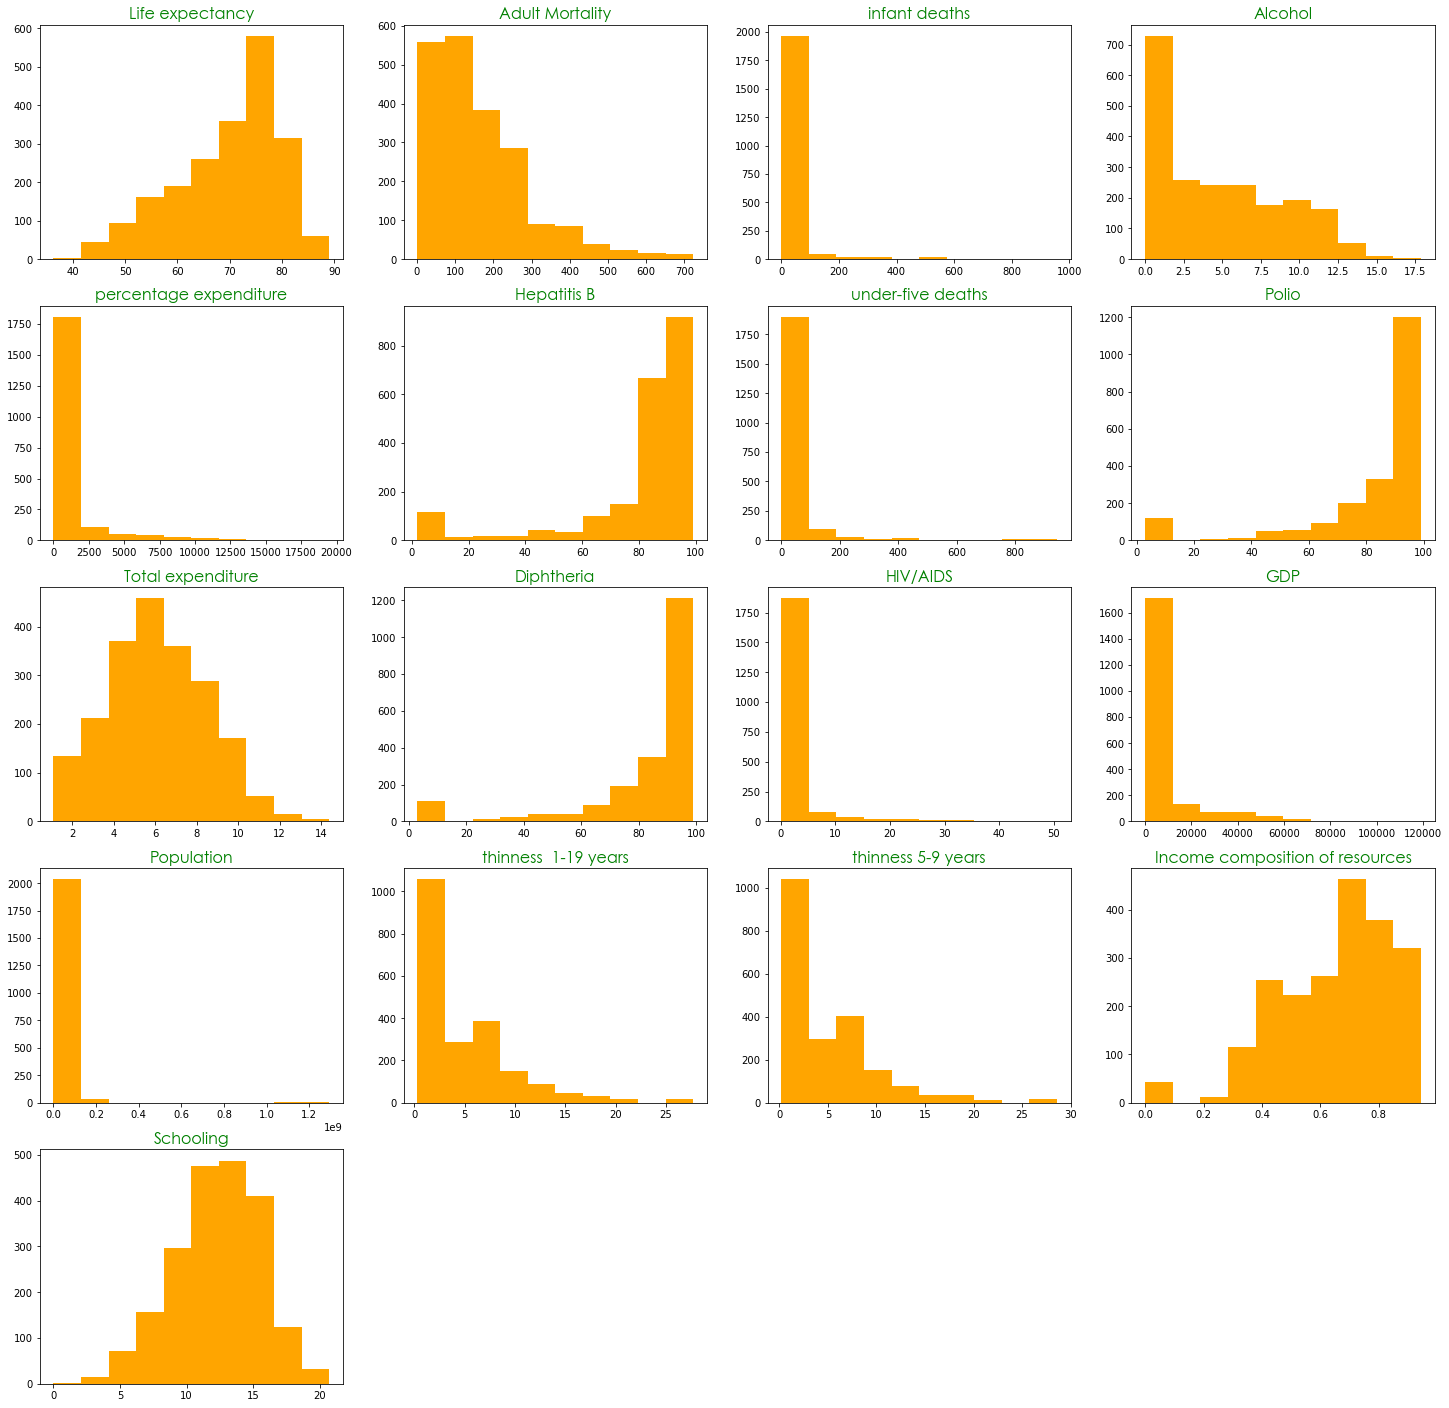

In [15]:
death = death.dropna()
title_style = {'family': 'Century Gothic', 'color': 'green', 'size': 16 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 16}
values = {'Life expectancy':1,'Adult Mortality':2,'infant deaths':3,'Alcohol':4,'percentage expenditure':5,
          'Hepatitis B':6,'under-five deaths':7,'Polio':8,'Total expenditure':9,'Diphtheria':10,
          'HIV/AIDS':11,'GDP':12,'Population':13,'thinness  1-19 years':14,'thinness 5-9 years':15,
          'Income composition of resources':16,'Schooling':17}
plt.figure(figsize=(25,25))

for value, i in values.items():
    plt.subplot(5,4,i)
    plt.hist(death[value],color="orange")
    plt.title(value ,fontdict = title_style)

plt.show()

Burada histogram grafiklerini çizdirmemin sebebi hangi değişkenlerin normale yakın olduğunu görebilmek. 

Burada  normale yakın olup çarpık olan değerler; "Life expectancy, total expenditure,schooling"

Aynı zamanda ne kadar aykırı değer olduğunu görebilmek için box plot çizildi. 

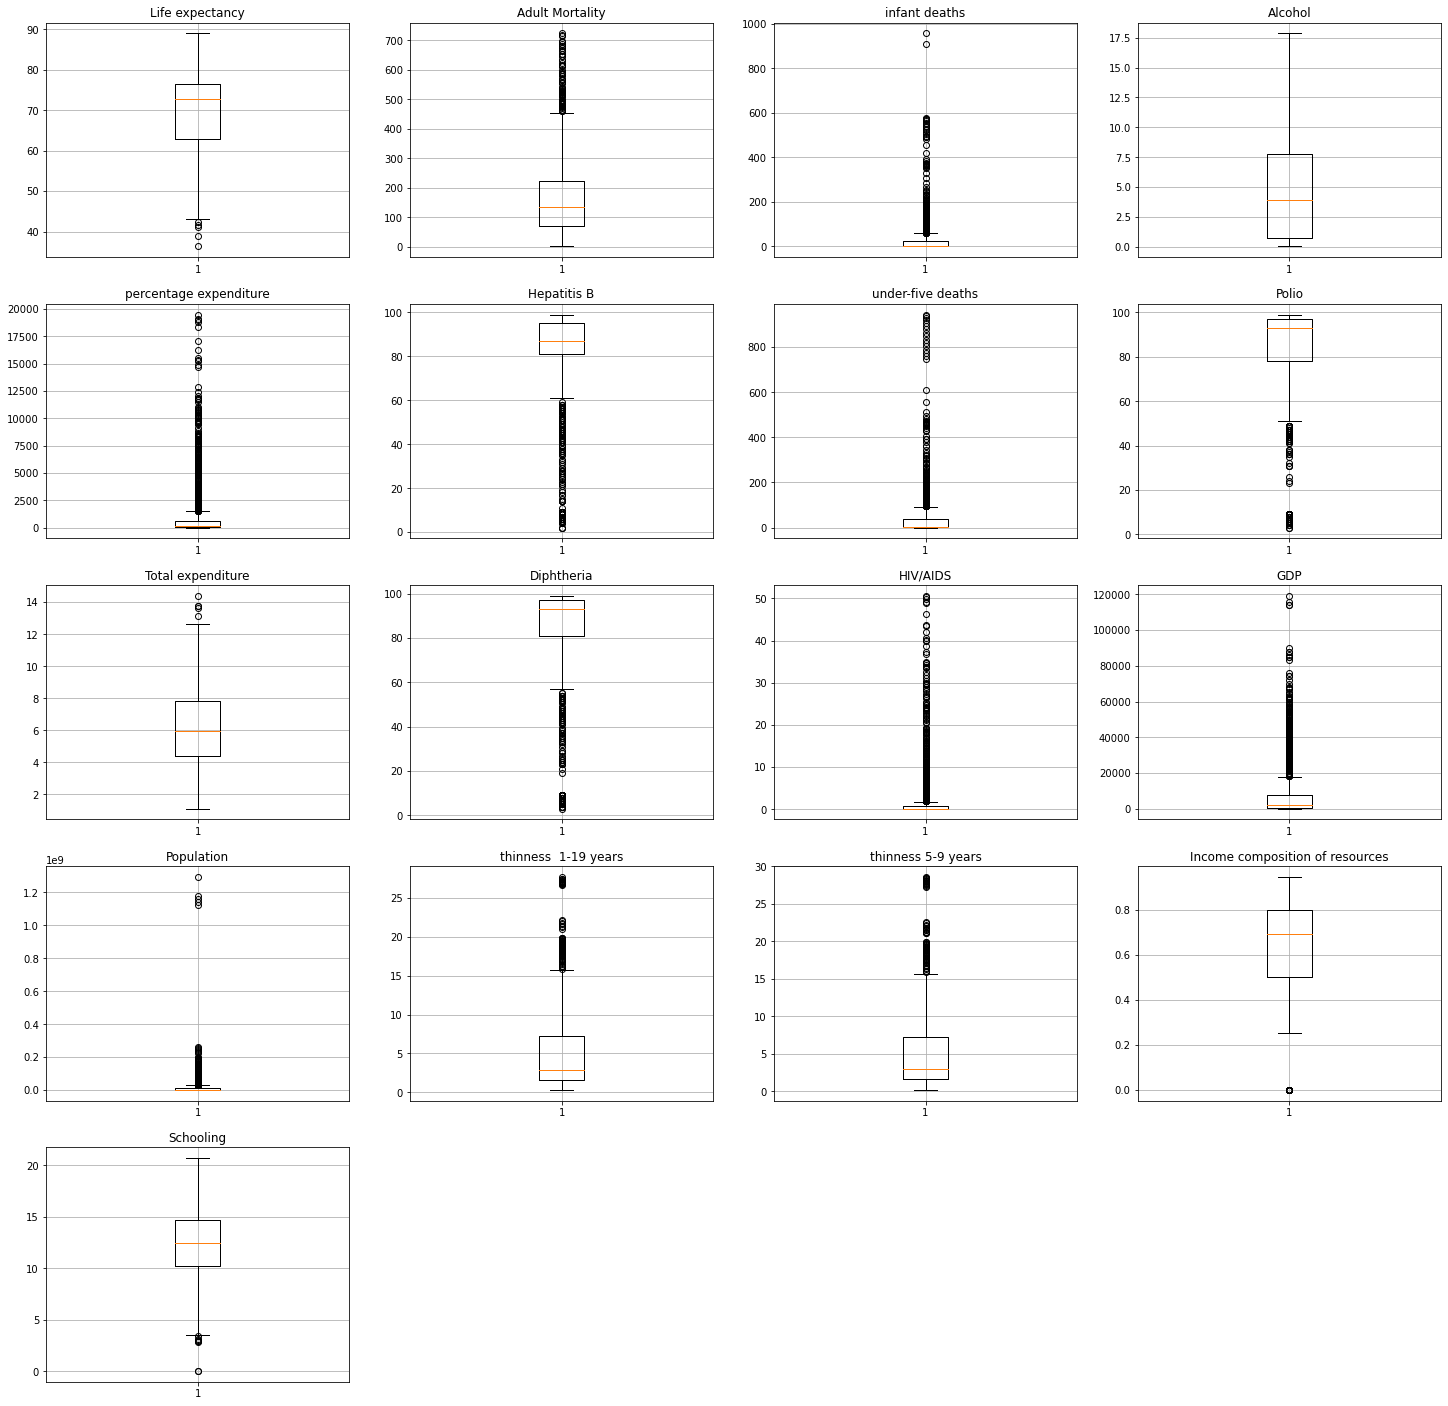

In [16]:
plt.figure(figsize=(25,25))

for value, i in values.items():
    plt.subplot(5,4,i)
    plt.boxplot(death[value].dropna())
    plt.title(value)
    plt.grid(True)
    
plt.show()

Burada aykırı değerlerin miktarları farklılık göstermekte. 

Öncelikle istatistiksel olarak aykırı değerleri tukey metodu ile oranları ve miktarlarını görelim.

Eşik değerini 1.5 olarak belirledim 

Çıkan aykırı değerleri winsorize ile temizleyelim. 

In [17]:
death= death.dropna()
def NumberOfOutliers(col, data=death):
    print('-'*10 + col + '-'*10)
    q75, q25 = np.percentile(data[col], [75, 25])
    IQR = q75 - q25
    min_value = q25 - (IQR*1.5)
    max_value = q75 + (IQR*1.5)
    outlierValueNumber = len(np.where((data[col] > max_value) | (data[col] < min_value))[0])
    outlierValuePercent = round(outlierValueNumber/len(data[col])*100)
    print('Number of outliers: {}'.format(outlierValueNumber))
    print('Percent of data that is outlier: {}%'.format(outlierValuePercent))

In [18]:
for col in values:
    NumberOfOutliers(col)

----------Life expectancy----------
Number of outliers: 5
Percent of data that is outlier: 0%
----------Adult Mortality----------
Number of outliers: 77
Percent of data that is outlier: 4%
----------infant deaths----------
Number of outliers: 179
Percent of data that is outlier: 9%
----------Alcohol----------
Number of outliers: 0
Percent of data that is outlier: 0%
----------percentage expenditure----------
Number of outliers: 301
Percent of data that is outlier: 15%
----------Hepatitis B----------
Number of outliers: 237
Percent of data that is outlier: 11%
----------under-five deaths----------
Number of outliers: 177
Percent of data that is outlier: 9%
----------Polio----------
Number of outliers: 185
Percent of data that is outlier: 9%
----------Total expenditure----------
Number of outliers: 5
Percent of data that is outlier: 0%
----------Diphtheria----------
Number of outliers: 207
Percent of data that is outlier: 10%
----------HIV/AIDS----------
Number of outliers: 400
Percent o

Yukarıdaki oranlara bakacak olursak en çok aykırı değer oranı HIV/AIDS olarak görülmektedir. 

Tüm değişkenleri outliers grafiğine ve describe  tablosuna bakarak uygun alt ve üst limit değerleri verdim.


In [19]:
death["wins_LifeExpectancy"]=(winsorize(np.array(death["Life expectancy"]),(0.021,0)))
death["wins_AdultMotality"]=(winsorize(np.array(death["Adult Mortality"]),(0,0.1)))
death["wins_InfantDeaths"]=(winsorize(np.array(death["infant deaths"]),(0,0.12)))
death["wins_Alcohol"]=(winsorize(np.array(death["Alcohol"]),(0,0.12)))
death["wins_PercentageEexpenditure"]=(winsorize(np.array(death["percentage expenditure"]),(0,0.20)))
death["wins_HepatitisB"]=(winsorize(np.array(death["Hepatitis B"]),(0.15,0.0)))
death["wins_underfivedeaths"]=(winsorize(np.array(death["under-five deaths"]),(0,0.14)))
death["wins_Polio"]=(winsorize(np.array(death["Polio"]),(0.1,0)))
death["wins_TotalExpenditure"]=(winsorize(np.array(death["Total expenditure"]),(0,0.01)))
death["wins_Diphtheria"]=(winsorize(np.array(death["Diphtheria"]),(0.1,0 )))
death["wins_HIV/AIDS"]=(winsorize(np.array(death["HIV/AIDS"]),(0,0.20)))
death["wins_GDP"]=(winsorize(np.array(death["GDP"]),(0,0.15)))
death["wins_Population"]=(winsorize(np.array(death["Population"]),(0,0.1)))
death["wins_thinness1-19years"]=(winsorize(np.array(death["thinness  1-19 years"]),(0,0.04)))
death["wins_thinness5-9years"]=(winsorize(np.array(death["thinness 5-9 years"]),(0,0.04)))
death["wins_IncomeCompositionOfResources"]=(winsorize(np.array(death["Income composition of resources"]),(0.05,0)))
death["wins_Schooling"]=(winsorize(np.array(death["Schooling"]),(0.02,0.02)))


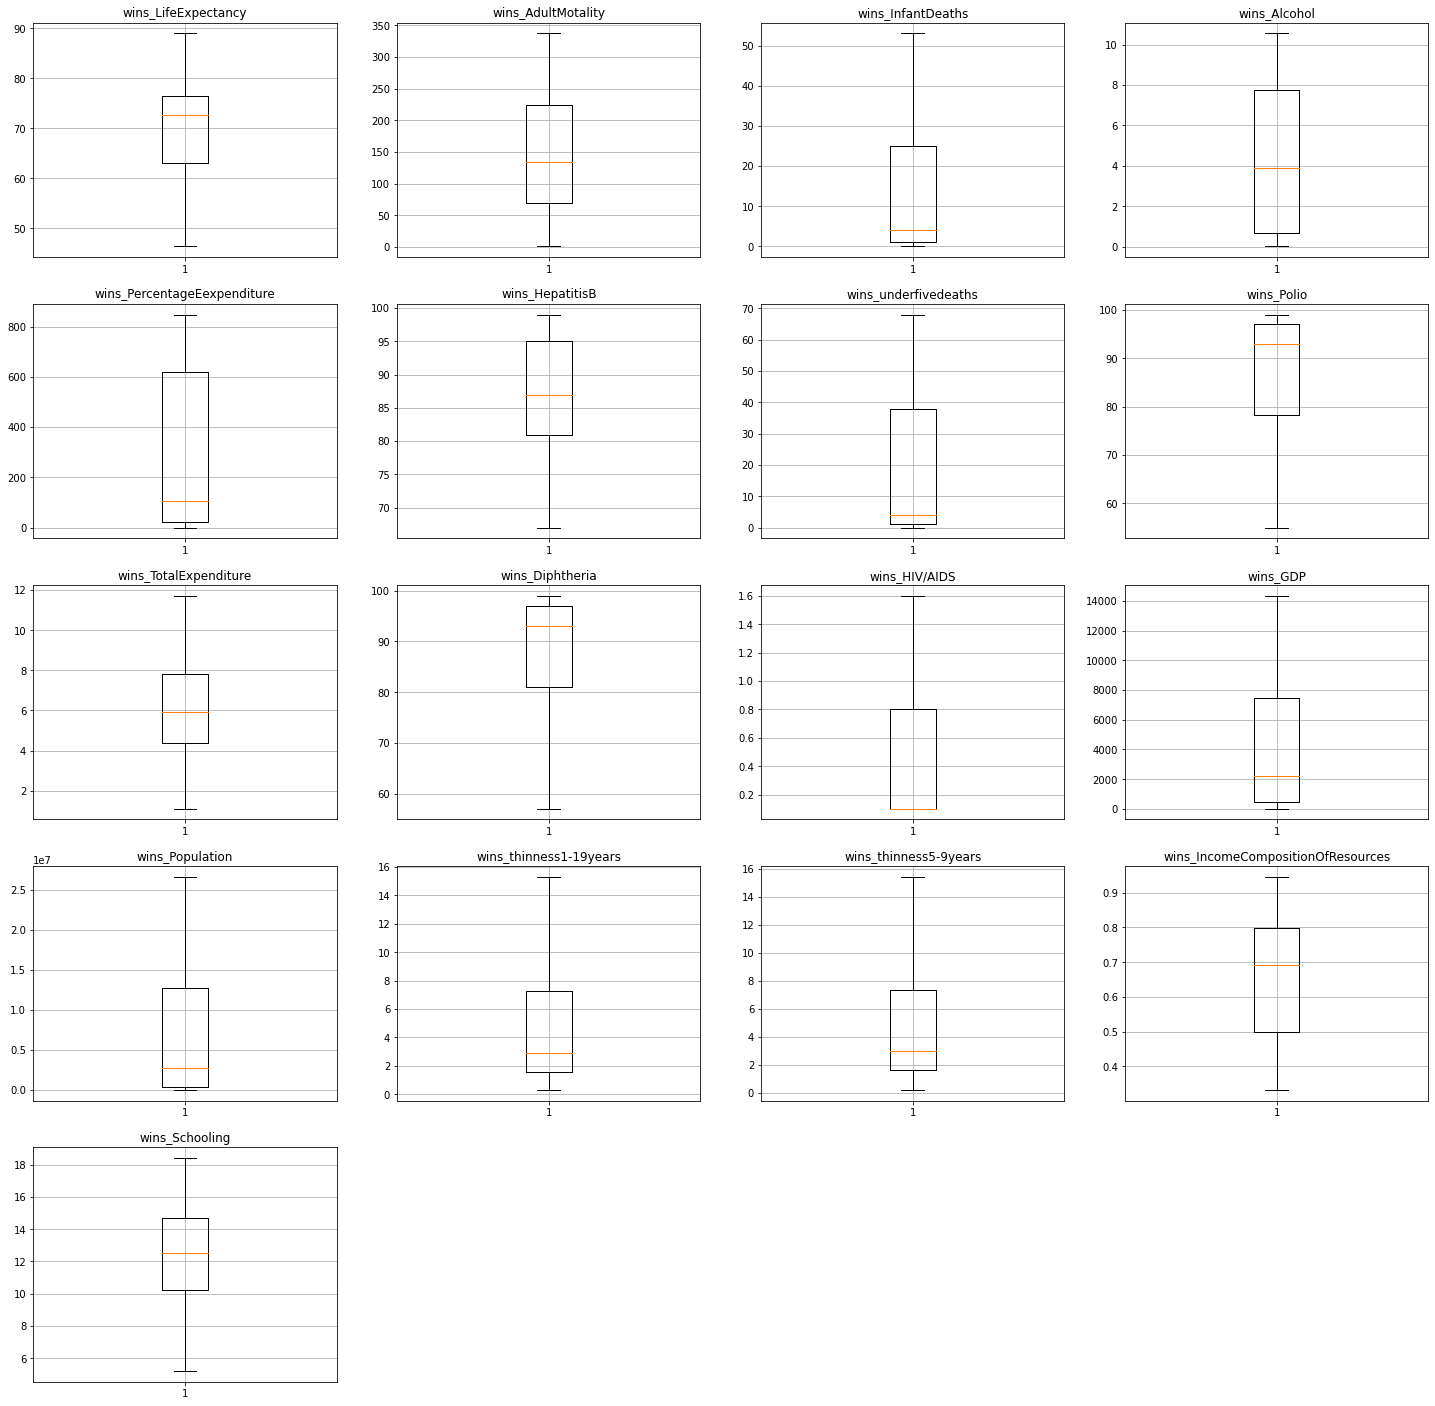

In [20]:
winsorizedCol= ['wins_LifeExpectancy', 'wins_AdultMotality', 'wins_InfantDeaths',"wins_Alcohol",
       'wins_PercentageEexpenditure', 'wins_HepatitisB',
       'wins_underfivedeaths', 'wins_Polio', 'wins_TotalExpenditure',
       'wins_Diphtheria', 'wins_HIV/AIDS', 'wins_GDP', 'wins_Population',
       'wins_thinness1-19years', 'wins_thinness5-9years',
       'wins_IncomeCompositionOfResources', 'wins_Schooling']

plt.figure(figsize=(25,25))

for j,value in enumerate(winsorizedCol):
    plt.subplot(5,4,j+1)
    plt.boxplot(death[value])
    plt.title(value)
    plt.grid(True)
    
plt.show()

Değerlerin normal dağılıp dağılmadığını istatistiksel olarak görmek için jaeque bera ve normallik testi yapıldı.

In [21]:
death.dropna(inplace=True)

from scipy.stats import jarque_bera
from scipy.stats import normaltest
pd.options.display.float_format = '{:.5f}'.format


distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in winsorizedCol:
    jb_stats = jarque_bera((death[variable]))
    norm_stats = normaltest((death[variable]))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests


variable  jarque_bera_stats  jarque_bera_p_value  \
0                 wins_LifeExpectancy          148.69243              0.00000   
1                  wins_AdultMotality          136.58834              0.00000   
2                   wins_InfantDeaths          429.98787              0.00000   
3                        wins_Alcohol          192.40542              0.00000   
4         wins_PercentageEexpenditure          308.80476              0.00000   
5                     wins_HepatitisB          168.57557              0.00000   
6                wins_underfivedeaths          404.67297              0.00000   
7                          wins_Polio          457.52092              0.00000   
8               wins_TotalExpenditure           20.41340              0.00004   
9                     wins_Diphtheria          466.96661              0.00000   
10                      wins_HIV/AIDS          468.59088              0.00000   
11                           wins_GDP          373.92332              0.00000   
12                    wins_Population          516.81211              0.00000   
13             wins_thinness1-19years          426.77014              0.00000   
14              wins_thinness5-9years          420.55956              0.00000   
15  wins_IncomeCompositionOfResources          135.05627              0.00000   
16                     wins_Schooling           45.14322              0.00000   

    normal_stats  normal_p_value  
0      136.71988         0.00000  
1      326.70718         0.00000  
2      300.33525         0.00000  
3    18382.58426         0.00000  
4     1054.40939         0.00000  
5      765.55720         0.00000  
6      312.39677         0.00000  
7      304.11689         0.00000  
8       29.88711         0.00000  
9      308.71449         0.00000  
10     354.74959         0.00000  
11     282.47209         0.00000  
12     333.41110         0.00000  
13     292.05264         0.00000  
14     289.02168         0.00000  
15     575.22629         0.00000  
16      62.12421         0.00000

Tabloya göre tüm veriler %95 güven aralığında, 0.05 anlam düzeyine göre P değerleri küçük çıktığı için 
normal dağılıma uymadığı gözlemlenmektedir .

Değerleri normalize edelim.

In [22]:
death.dropna()
from sklearn.preprocessing import normalize
normal_featured= []
for variable in winsorizedCol:
    death["norm_"+variable] = normalize(np.array(death[variable]).reshape(1,-1)).reshape(-1,1)
    

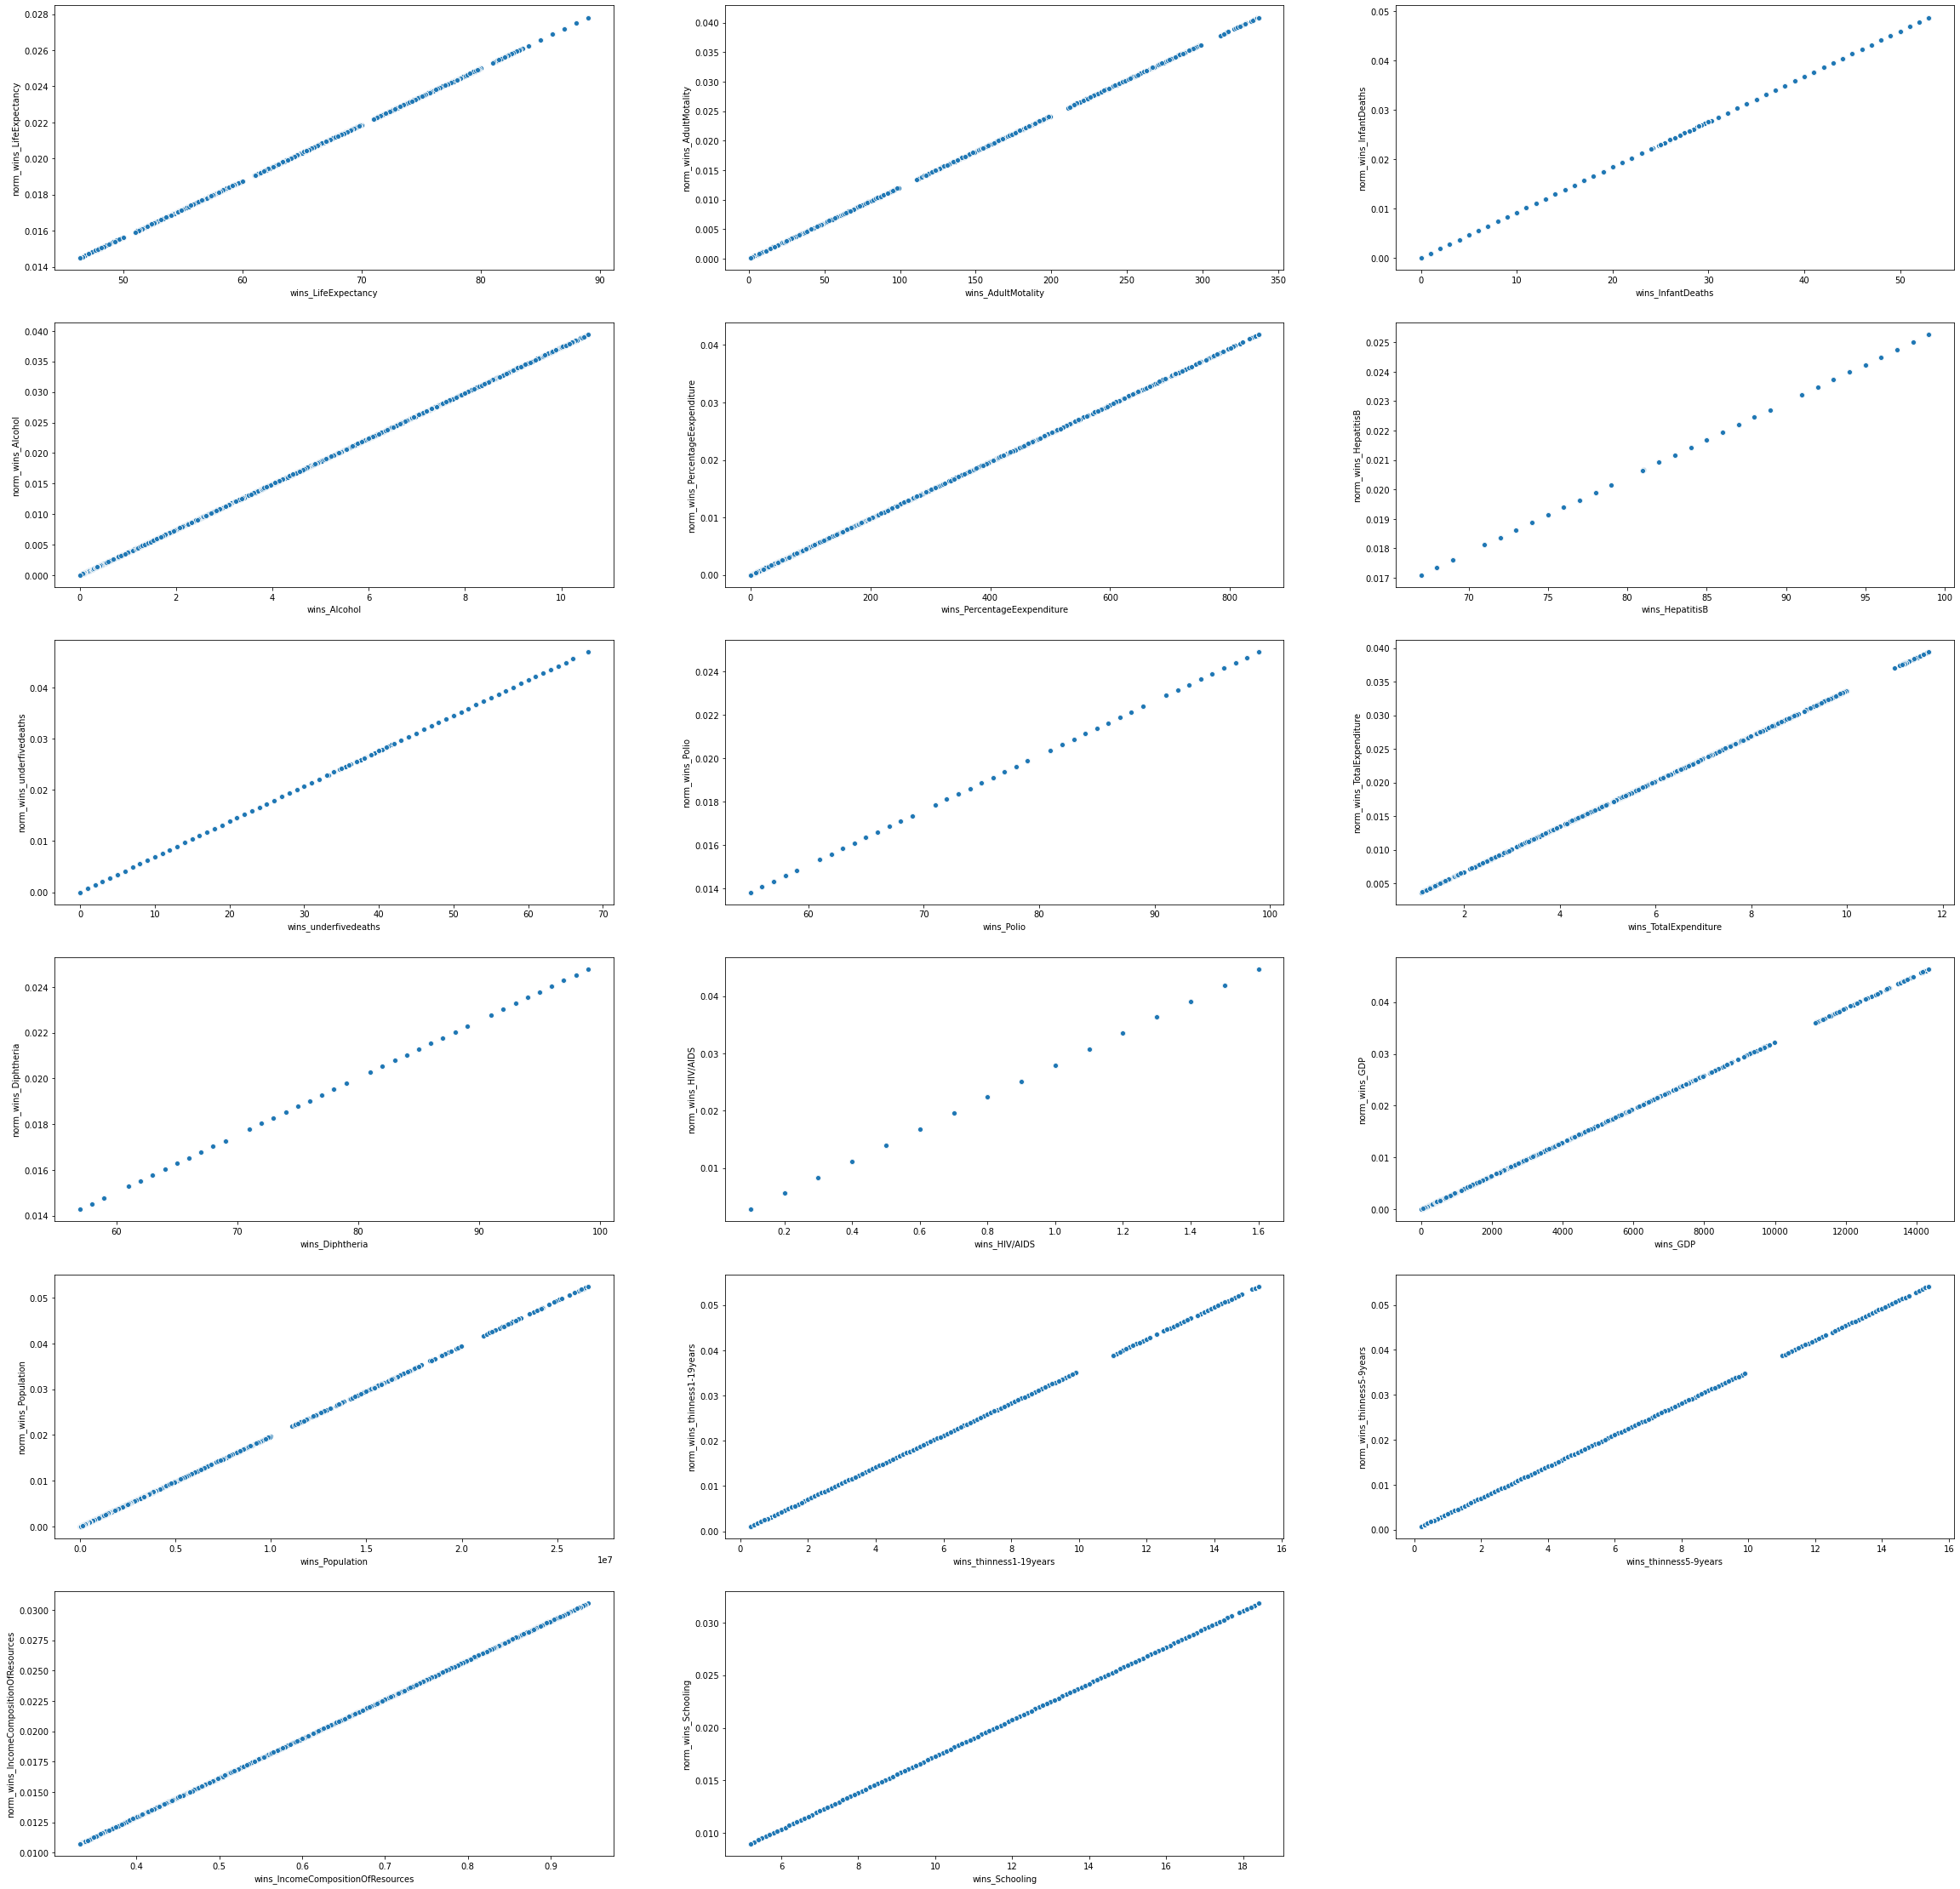

In [23]:
norm_wins = ['wins_LifeExpectancy', 'wins_AdultMotality', 'wins_InfantDeaths',"wins_Alcohol",
       'wins_PercentageEexpenditure', 'wins_HepatitisB', 
       'wins_underfivedeaths', 'wins_Polio', 'wins_TotalExpenditure',
       'wins_Diphtheria', 'wins_HIV/AIDS', 'wins_GDP', 'wins_Population',
       'wins_thinness1-19years', 'wins_thinness5-9years',
       'wins_IncomeCompositionOfResources', 'wins_Schooling',
       'norm_wins_LifeExpectancy', 'norm_wins_AdultMotality',
       'norm_wins_InfantDeaths','norm_wins_Alcohol', 'norm_wins_PercentageEexpenditure',
       'norm_wins_HepatitisB',
       'norm_wins_underfivedeaths', 'norm_wins_Polio',
       'norm_wins_TotalExpenditure', 'norm_wins_Diphtheria',
       'norm_wins_HIV/AIDS', 'norm_wins_GDP', 'norm_wins_Population',
       'norm_wins_thinness1-19years', 'norm_wins_thinness5-9years',
       'norm_wins_IncomeCompositionOfResources', 'norm_wins_Schooling']
 
plt.figure(figsize=(40,40))

for i in range(int(len(norm_wins)/2)):
    plt.subplot(6,3,i+1)
    sns.scatterplot(death[norm_wins[i]], death[norm_wins[17+i]])


Burada normalizasyon yapmamın amacı, sayısal değişkenlerin değer arasındaki farklılıkları bozmadan ortak bir ölçeğe dönüştürmek. Farklı aralıkta dağılan sayısal değişkenler olduğu için burada normalizasyon yapmak mantıklıdır. 

Örneğin Population değişkeni çok büyük değerler alırken,  infant death sütunundaki değerler 2 basamaklı sayılardan oluşmaktadır. 

# DATA EXPLORATION UNIVARIATE ANALYSIS

Bundan sonra kullanacağımız sütunlar sadece normalize ve winsorize edilmiş değerler olduğu için kalan değişkenleri sildik. 

In [24]:
death.columns

Index(['Country', 'Year', 'Continents', 'Status', 'Life expectancy',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'wins_LifeExpectancy', 'wins_AdultMotality', 'wins_InfantDeaths',
       'wins_Alcohol', 'wins_PercentageEexpenditure', 'wins_HepatitisB',
       'wins_underfivedeaths', 'wins_Polio', 'wins_TotalExpenditure',
       'wins_Diphtheria', 'wins_HIV/AIDS', 'wins_GDP', 'wins_Population',
       'wins_thinness1-19years', 'wins_thinness5-9years',
       'wins_IncomeCompositionOfResources', 'wins_Schooling',
       'norm_wins_LifeExpectancy', 'norm_wins_AdultMotality',
       'norm_wins_InfantDeaths', 'norm_wins_Alcohol',
       'norm_wins_PercentageEexpenditure', 'norm_wins_HepatitisB',
       'norm_wins_underfivedea

In [25]:
deaths2 = death.drop(['Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'wins_LifeExpectancy', 'wins_AdultMotality', 'wins_InfantDeaths',"wins_Alcohol",
       'wins_PercentageEexpenditure', 'wins_HepatitisB', 
       'wins_underfivedeaths', 'wins_Polio', 'wins_TotalExpenditure',
       'wins_Diphtheria', 'wins_HIV/AIDS', 'wins_GDP', 'wins_Population',
       'wins_thinness1-19years', 'wins_thinness5-9years',
       'wins_IncomeCompositionOfResources', 'wins_Schooling'],axis=1,inplace=True)

In [26]:
#Burada object ve float değerleri ayrı ayrı yazdırmamın sebebi, nan görüntüsünün çok olmasını engellemek. 
death.describe().T

count       mean     std  \
Year                                   2070.00000 2007.44203 4.57157   
norm_wins_LifeExpectancy               2070.00000    0.02176 0.00307   
norm_wins_AdultMotality                2070.00000    0.01821 0.01231   
norm_wins_InfantDeaths                 2070.00000    0.01348 0.01736   
norm_wins_Alcohol                      2070.00000    0.01681 0.01416   
norm_wins_PercentageEexpenditure       2070.00000    0.01459 0.01644   
norm_wins_HepatitisB                   2070.00000    0.02181 0.00275   
norm_wins_underfivedeaths              2070.00000    0.01346 0.01738   
norm_wins_Polio                        2070.00000    0.02168 0.00360   
norm_wins_TotalExpenditure             2070.00000    0.02048 0.00798   
norm_wins_Diphtheria                   2070.00000    0.02172 0.00339   
norm_wins_HIV/AIDS                     2070.00000    0.01378 0.01713   
norm_wins_GDP                          2070.00000    0.01462 0.01642   
norm_wins_Population                   2070.00000    0.01388 0.01705   
norm_wins_thinness1-19years            2070.00000    0.01661 0.01440   
norm_wins_thinness5-9years             2070.00000    0.01661 0.01439   
norm_wins_IncomeCompositionOfResources 2070.00000    0.02125 0.00562   
norm_wins_Schooling                    2070.00000    0.02130 0.00544   

                                              min        25%        50%  \
Year                                   2000.00000 2003.00000 2007.00000   
norm_wins_LifeExpectancy                  0.01450    0.01968    0.02272   
norm_wins_AdultMotality                   0.00012    0.00837    0.01632   
norm_wins_InfantDeaths                    0.00000    0.00092    0.00367   
norm_wins_Alcohol                         0.00004    0.00254    0.01452   
norm_wins_PercentageEexpenditure          0.00000    0.00102    0.00521   
norm_wins_HepatitisB                      0.01709    0.02065    0.02220   
norm_wins_underfivedeaths                 0.00000    0.00069    0.00276   
norm_wins_Polio                           0.01384    0.01969    0.02340   
norm_wins_TotalExpenditure                0.00371    0.01475    0.01997   
norm_wins_Diphtheria                      0.01427    0.02028    0.02328   
norm_wins_HIV/AIDS                        0.00280    0.00280    0.00280   
norm_wins_GDP                             0.00001    0.00149    0.00706   
norm_wins_Population                      0.00000    0.00075    0.00530   
norm_wins_thinness1-19years               0.00106    0.00566    0.01026   
norm_wins_thinness5-9years                0.00070    0.00563    0.01055   
norm_wins_IncomeCompositionOfResources    0.01073    0.01616    0.02233   
norm_wins_Schooling                       0.00899    0.01764    0.02162   

                                              75%        max  
Year                                   2011.00000 2015.00000  
norm_wins_LifeExpectancy                  0.02387    0.02781  
norm_wins_AdultMotality                   0.02717    0.04088  
norm_wins_InfantDeaths                    0.02297    0.04869  
norm_wins_Alcohol                         0.02891    0.03937  
norm_wins_PercentageEexpenditure          0.03046    0.04179  
norm_wins_HepatitisB                      0.02424    0.02526  
norm_wins_underfivedeaths                 0.02627    0.04700  
norm_wins_Polio                           0.02440    0.02491  
norm_wins_TotalExpenditure                0.02627    0.03944  
norm_wins_Diphtheria                      0.02428    0.02479  
norm_wins_HIV/AIDS                        0.02237    0.04474  
norm_wins_GDP                             0.02419    0.04636  
norm_wins_Population                      0.02515    0.05250  
norm_wins_thinness1-19years               0.02583    0.05414  
norm_wins_thinness5-9years                0.02567    0.05415  
norm_wins_IncomeCompositionOfResources    0.02576    0.03054  
norm_wins_Schooling                       0.02542    0.03182

In [27]:
death.describe(include="object").T

count unique                 top  freq
Country     2070    131             Ukraine    16
Continents  2070     10  Sub-Saharan Africa   543
Status      2070      2          Developing  1616

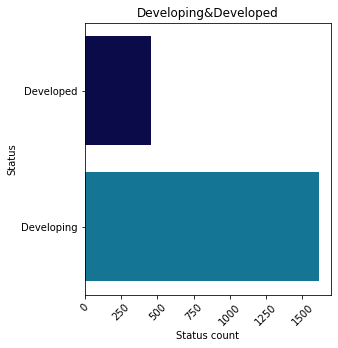

In [28]:
#Burada görüldüğü üzere gelişmekte olan ülkeler daha fazla.
#Bunun dezavantajı developing fazla olduğu için developed'in etkisini kestirmek güç olabilir. 

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(death.groupby("Status")["Status"].count(),
           death.groupby("Status")["Status"].count().index,palette="ocean")
plt.title("Developing&Developed")
plt.xlabel("Status count")
plt.xticks(rotation=45)

plt.show()

In [29]:
fig = px.bar(data_frame=death[death.Country == 'Turkey'], 
             x='Year', 
             y='norm_wins_LifeExpectancy')
fig.show()

Aşağıdaki grafikte ise yıllara göre Developed ve Developing Life Expectancy değerleri yavaş bir hızla arttığı görülmekte.

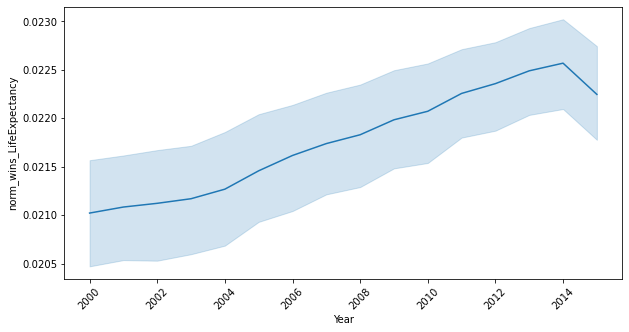

In [30]:
plt.figure(figsize=(10,5))

sns.lineplot(death["Year"],
           death["norm_wins_LifeExpectancy"],palette="ocean")
plt.xticks(rotation=45)

plt.show()


In [31]:
fig = px.bar(data_frame=death, 
             x='Continents', 
             y='norm_wins_LifeExpectancy',color = 'Continents')
fig.show()

En yüksek ortalama yaşam süresine sahip 10 ülke

In [32]:

Life_Count = death.groupby(death['Country'])['norm_wins_LifeExpectancy'].mean()
Life_Count = pd.DataFrame(index = death['Country'].unique(),data=Life_Count)
Life_Count = Life_Count.sort_values(by='norm_wins_LifeExpectancy',ascending=False)
Life_Count=Life_Count.head(10)

fig=px.pie(data_frame=Life_Count,
          names=Life_Count.index,
          values='norm_wins_LifeExpectancy',
          opacity=0.9,
          template='seaborn',
          color_discrete_sequence=px.colors.sequential.Cividis,
          hole=0.5,
          )

fig.update_traces(pull=0.05,textinfo='percent+label',rotation=90)

fig.update_layout(title='Pie Chart',
                 paper_bgcolor='rgb(230,230,230)',
                 plot_bgcolor='rgb(243,243,243)',
                 annotations=[dict(text='Mean Life Expectancy',showarrow=False,font_size=15)]
                 )



fig.show()

#  MULTIVARIATE ANALYSIS

In [33]:
death_corr = death.corr().T

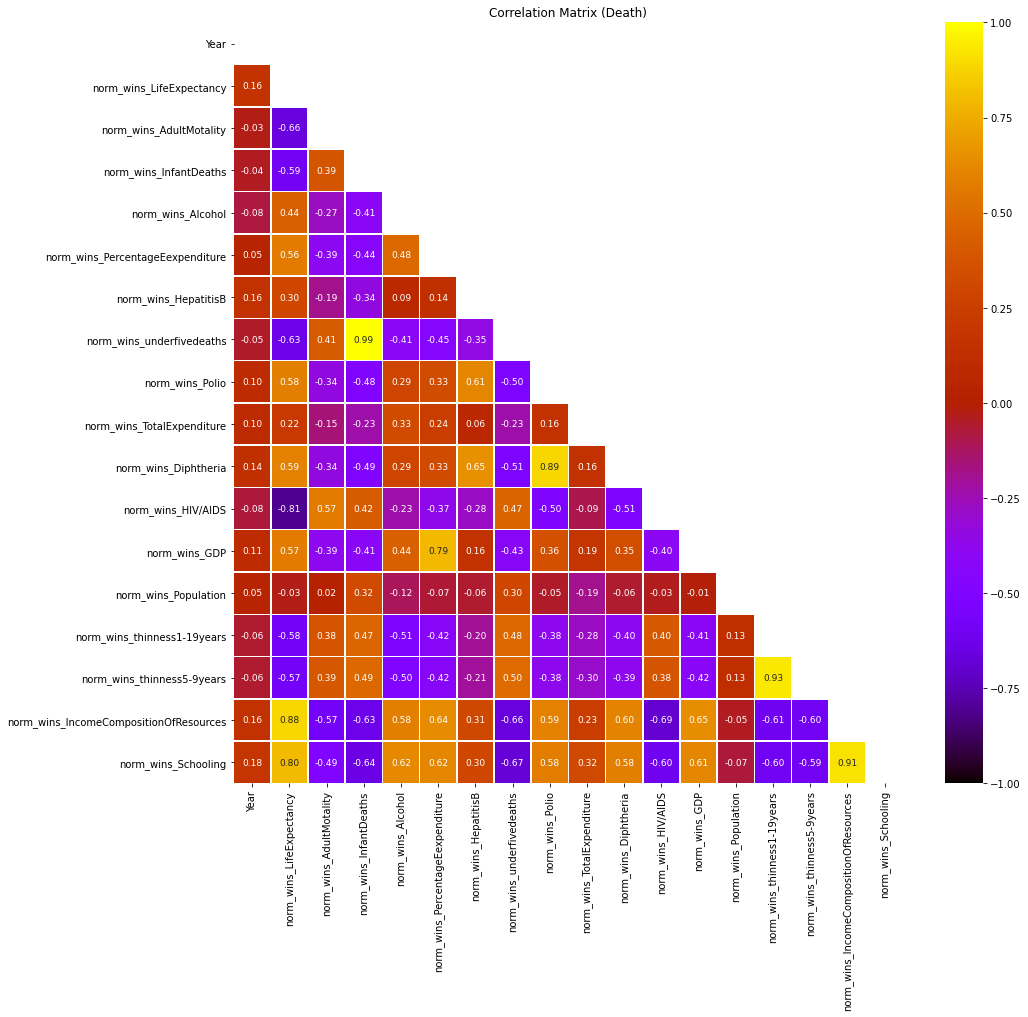

In [46]:
plt.figure(figsize=(15,14))
mask = np.triu(death_corr)
sns.heatmap(death_corr, annot=True, fmt='.2f', annot_kws={"size":9 }, linewidths=.5, vmin=-1, vmax=1, cmap='gnuplot',
            mask=mask)
plt.title("Correlation Matrix (Death)")

plt.show()

Burada korelasyon ilişkilerine bakacak olursak, hem negatif hem de pozitif yönlü korelasyon görülmektedir.

Çokluk olarak negatif ilişki daha fazladır. 

Life Expectancy'i bebek ve genç ölümleri zıt yönlü olarak etkilemektedir. Bu da mantıklı bir ilişki olduğu görülmektedir.

Dikkat çeken noktalardan biri de Percentage Expendeture olan ilişkinin çok yüksek olmaması. Yani sağlık harcamalarının artması beklenen yaşam süresinin artmasına çok fazla katkısı olmadığı görülmekte.

In [35]:
import plotly.express as px

LifeExp_Countries = death.groupby(["Status",'Year']).sum().reset_index()
fig = px.bar(data_frame=LifeExp_Countries, 
             x='Year', y='norm_wins_LifeExpectancy', color = 'Status')
            

fig.show()

Üstteki grafiğe göre yıllara göre yaşam süresi sürekli arttığı görülmektedir.

2015'te düşüş yaşandığı değil bilgi eksikliğinden kaynaklı olabilir. 


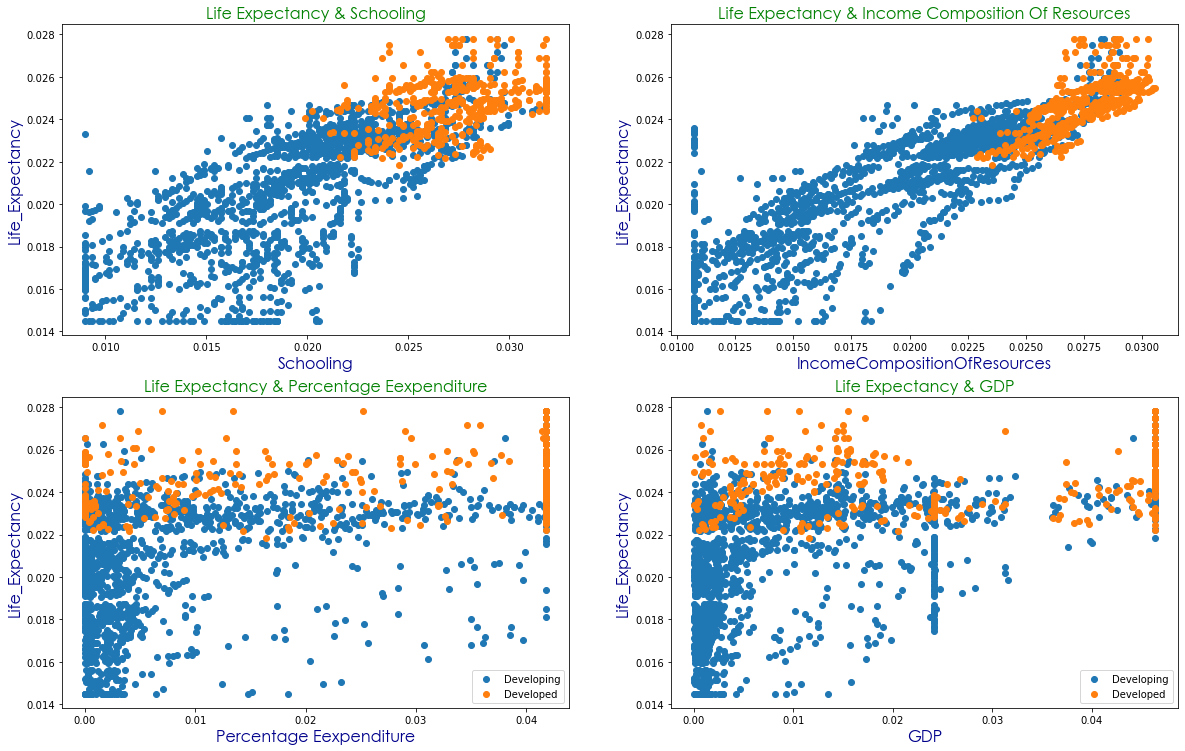

In [36]:
plt.figure(figsize=(20, 40))
plt.subplot(6,2,1)
plt.title('Life Expectancy & Schooling', fontdict = title_style)
for status in ['Developing', 'Developed']:
    plt.scatter(death[death.Status == status].norm_wins_Schooling, 
                death[death.Status == status].norm_wins_LifeExpectancy, label = status)
plt.xlabel('Schooling',fontdict = axis_style)
plt.ylabel('Life_Expectancy', fontdict = axis_style)

plt.subplot(6,2,2)
plt.title('Life Expectancy & Income Composition Of Resources', fontdict = title_style)
for status in ['Developing', 'Developed']:
    plt.scatter(death[death.Status == status].norm_wins_IncomeCompositionOfResources, 
                death[death.Status == status].norm_wins_LifeExpectancy, label = status)
plt.xlabel('IncomeCompositionOfResources',fontdict = axis_style)
plt.ylabel('Life_Expectancy', fontdict = axis_style)

plt.subplot(6,2,3)
plt.title('Life Expectancy & Percentage Eexpenditure', fontdict = title_style)
for status in ['Developing', 'Developed']:
    plt.scatter(death[death.Status == status].norm_wins_PercentageEexpenditure, 
                death[death.Status == status].norm_wins_LifeExpectancy, label = status)
plt.xlabel('Percentage Eexpenditure',fontdict = axis_style)
plt.ylabel('Life_Expectancy', fontdict = axis_style)
plt.legend()

plt.subplot(6,2,4)
plt.title('Life Expectancy & GDP', fontdict = title_style)
for status in ['Developing', 'Developed']:
    plt.scatter(death[death.Status == status].norm_wins_GDP, 
                death[death.Status == status].norm_wins_LifeExpectancy, label = status)
plt.xlabel('GDP',fontdict = axis_style)
plt.ylabel('Life_Expectancy', fontdict = axis_style)
plt.legend()
plt.show()

İlk iki  grafikte çoğunlukla doğru orantı var iken, son iki grafikte zaman zaman harcamalar artsa bile yaşam süresinde bir değişme olmadığını görüyoruz. 

İnsani Gelişme Endeksi  zaten ömür süresi ve eğitim düzeyine göre ölçüldüğü için aynı şekilde doğrusal bir artış göstermekte.

Üçüncü grafikte kişisel sağlık harcamaları artsa da değişme olmadığı görülmekte.

Aynı şekilde Kişi başı milli gelir artsada önemli bir değişme olmadığı görülmekte.

Bu aşamadan sonra temel bileşen analizi yapabiliriz artık. 

# PCA

Normalde 23 kolonlu değişkenli bir veri olduğu için PCA analizine gerek yok fakat olsaydı nasıl olurdu diye gösterme amaçlı çizdirdim.

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [39]:
death_df=death.select_dtypes(exclude='object')
death_df.drop("norm_wins_LifeExpectancy", axis = 1,inplace=True)
death_df.drop("Year", axis = 1,inplace=True)
death_df.dropna(inplace=True)
len(death_df.columns)


16

In [40]:
death_df.columns

Index(['norm_wins_AdultMotality', 'norm_wins_InfantDeaths',
       'norm_wins_Alcohol', 'norm_wins_PercentageEexpenditure',
       'norm_wins_HepatitisB', 'norm_wins_underfivedeaths', 'norm_wins_Polio',
       'norm_wins_TotalExpenditure', 'norm_wins_Diphtheria',
       'norm_wins_HIV/AIDS', 'norm_wins_GDP', 'norm_wins_Population',
       'norm_wins_thinness1-19years', 'norm_wins_thinness5-9years',
       'norm_wins_IncomeCompositionOfResources', 'norm_wins_Schooling'],
      dtype='object')

In [41]:
X=death_df.values
pca = PCA(n_components=16)
principalComponents=pca.fit_transform(X)
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print("---"*25)
print(cumsum_var)

[0.47448043 0.14004356 0.09791186 0.08805634 0.06676091 0.04219969
 0.03088431 0.0213416  0.01912648 0.00686231 0.00537942 0.00372082
 0.0012884  0.00083208 0.00060087 0.00051091]
---------------------------------------------------------------------------
[ 47.45  61.45  71.24  80.05  86.73  90.95  94.04  96.17  98.08  98.77
  99.31  99.68  99.81  99.89  99.95 100.  ]


Burada feature engineering yapmak için object değerlerin olmaması gerekir ve kaç tane değişken kullancağamızı yazmak için len komutunu kullandık . 

Daha önce bileşenleri scale ettiğimiz için burada tekrar scale etmedik.

İlk array satırında değişkenlerin sırasıyla hedef değişkeni ne kadar açıkladıkları yazarken, 2. satırda ise kümülatif toplamları yazıyor. 

Kümülatif toplam sayesinde kaç tane değişken alacağımıza karar verebiliriz. Burada 4. değer %80'e yakın bir değer olduğu için oraya kadar olan kısmı almaya karar verebilirim.  

Fakat daha fazla bileşen eklesemde yine de daha az olacağı için %95 seviyelerine kadar alabilirim.


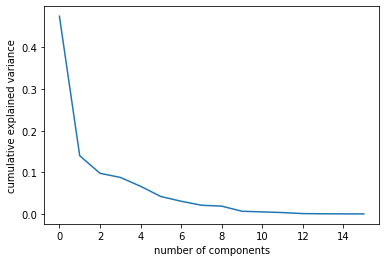

In [42]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Grafiktende görüleceği üzere 1. componentten sonra hızlı bir düşüş yaşanmış. Fakat sadece 1. componenti almak mantıklı olmaz çünkü %57'lük bir bilgi kaybımız olacaktır.



In [43]:
pca = PCA(n_components=8)
principalComponents=pca.fit_transform(X)
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.47448043 0.14004356 0.09791186 0.08805634 0.06676091 0.04219969
 0.03088431 0.0213416 ]
[47.45 61.45 71.24 80.05 86.73 90.95 94.04 96.17]


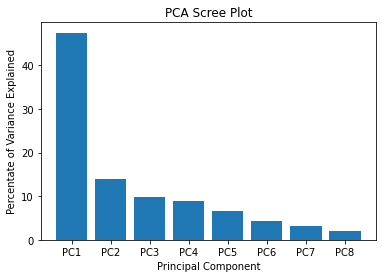

In [44]:
# Scree Plot
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8']
plt.bar(x= range(1,9), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Burada da bar grafiğinde bileşenlerin yüzde kaçlık etki ettiğini gözlemliyoruz. 


Görüldüğü üzere 1. bileşen en iyi açıklarken, diğer bileşenler arasında daha az farklar vardır. 

# REPORT

İlk olarak projeye başlarken verileri anlamak için tanımlama fonksiyonları kullandım. Bunlara bakarken verimin ne kadar kısmı kategorik ne kadarı nümerik diye inceledim. Sütun değerlerine genel olarak bakıp değeri anlamaya çalıştım.

Veriyi describe ettikten sonra veride mantık dışı bilgiler var mı diye inceledim ve bu inceleme sonunda birkaç mantıklı olmayan veri kümelerine rastladım. Bu mantıksızlıkları giderdikten sonra verimi tekrar kontrol edip devam ettim.

Kayıp değerlerin oranını inceledikten sonra sütun değerlerini inceleyerek verinin kayıp değerlerini hangi yöntemle yok edeceğime karar verdim. Kayıp değerleri 2 yöntemle yok ettikten sonra hala var olan kayıp değerleri silmeye karar verdim çünkü hiçbir bilgi olmadığı için, kayıp değerleri doldurmak bizim veri setimizi yanlış şekilde yönlendirip daha farklı sonuçlar almamıza sebep olabilir. 

Kayıp değerler kısmı bittikten sonra aykırı değerlerin histogramına ve boxplot grafiklerine baktım. Çoğu değişkenin histogram grafiğinin normal dağılıma uymadığını gördüm. Normale yaklaştırmak mümkün olmadığı için bu şekilde bırakarak en iyi sonuçlara ulaşabileceğimi düşündüm. Boxplot grafifğinde aykırı değerleri inceledikten sonra her değişkene uygun şekilde winsorize alt/üst sınır değerleri girerek aykırı değerlerin olmamasını sağladım .

Aykırı değerler gitse de jarque bera ve normallik testi sonucu dağılımların normal dağılıma uymadığını gözlemledim. 
Bazı değişkenlerin yapısıyla alakalı olarak çok büyük değerler alark diğer değişkenlerden farklı olduğu için tüm değerleri normalize ederek 0-1 arasında ölçeklendirdim. 

Multivariate Analsis'te object ve numerik değerleri ayrı ayrı tekrar inceledim. Object değerlerde 100 küsür ülke ile çalıştığımı gördüm. Aynı zamanda gelişmekte olan ülkelerin fazla olması gelişen ülkelerin etkisinin kestirilmesi açısından dezavantaj olabileceği kanısına vardım.

Daha sonra birbirleri arasındaki korelasyon ilişkilerini inceledim ve bazı soruların cevabını aradım. Daha sonra Life expectancy ile arasındaki ilişkileri daha iyi belirtmek için çeşitli grafikler çizerek görselleştirdim. Heatmap grafiğine bakarak life expectancy ile ilişki düzeyi yakın olan değişkenlerden seçim yaparak değişken sayısını azalttım.

En sonunda ise PCA analizi yaparak 22 değişken ile başladığım analizi 8 component ile açıklanabildiğini göstererek analizimi bitirdim.